<a href="https://colab.research.google.com/github/anhquan075/CS115/blob/main/SVM_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/CS115.L13.KHCL/Dataset(Tien)/UniversalBank (1).csv")
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
print(df.shape)

(5000, 14)


In [ ]:
df['Mortgage'].value_counts()

0      3462
98       17
103      16
119      16
83       16
       ... 
541       1
509       1
505       1
485       1
577       1
Name: Mortgage, Length: 347, dtype: int64

In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.value_counts()

ID    Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  Personal Loan  Securities Account  CD Account  Online  CreditCard
5000  28   4           83      92612     3       0.8    1          0         0              0                   0           1       1             1
1670  43   18          21      95037     2       1.4    2          0         0              0                   0           1       1             1
1663  63   38          84      94607     4       0.1    2          0         0              0                   0           0       0             1
1664  57   32          42      95070     3       0.5    2          0         0              1                   0           1       0             1
1665  61   35          63      91605     1       1.6    1          0         0              0                   0           1       0             1
                                                                                                                     

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] 
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i + 1})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

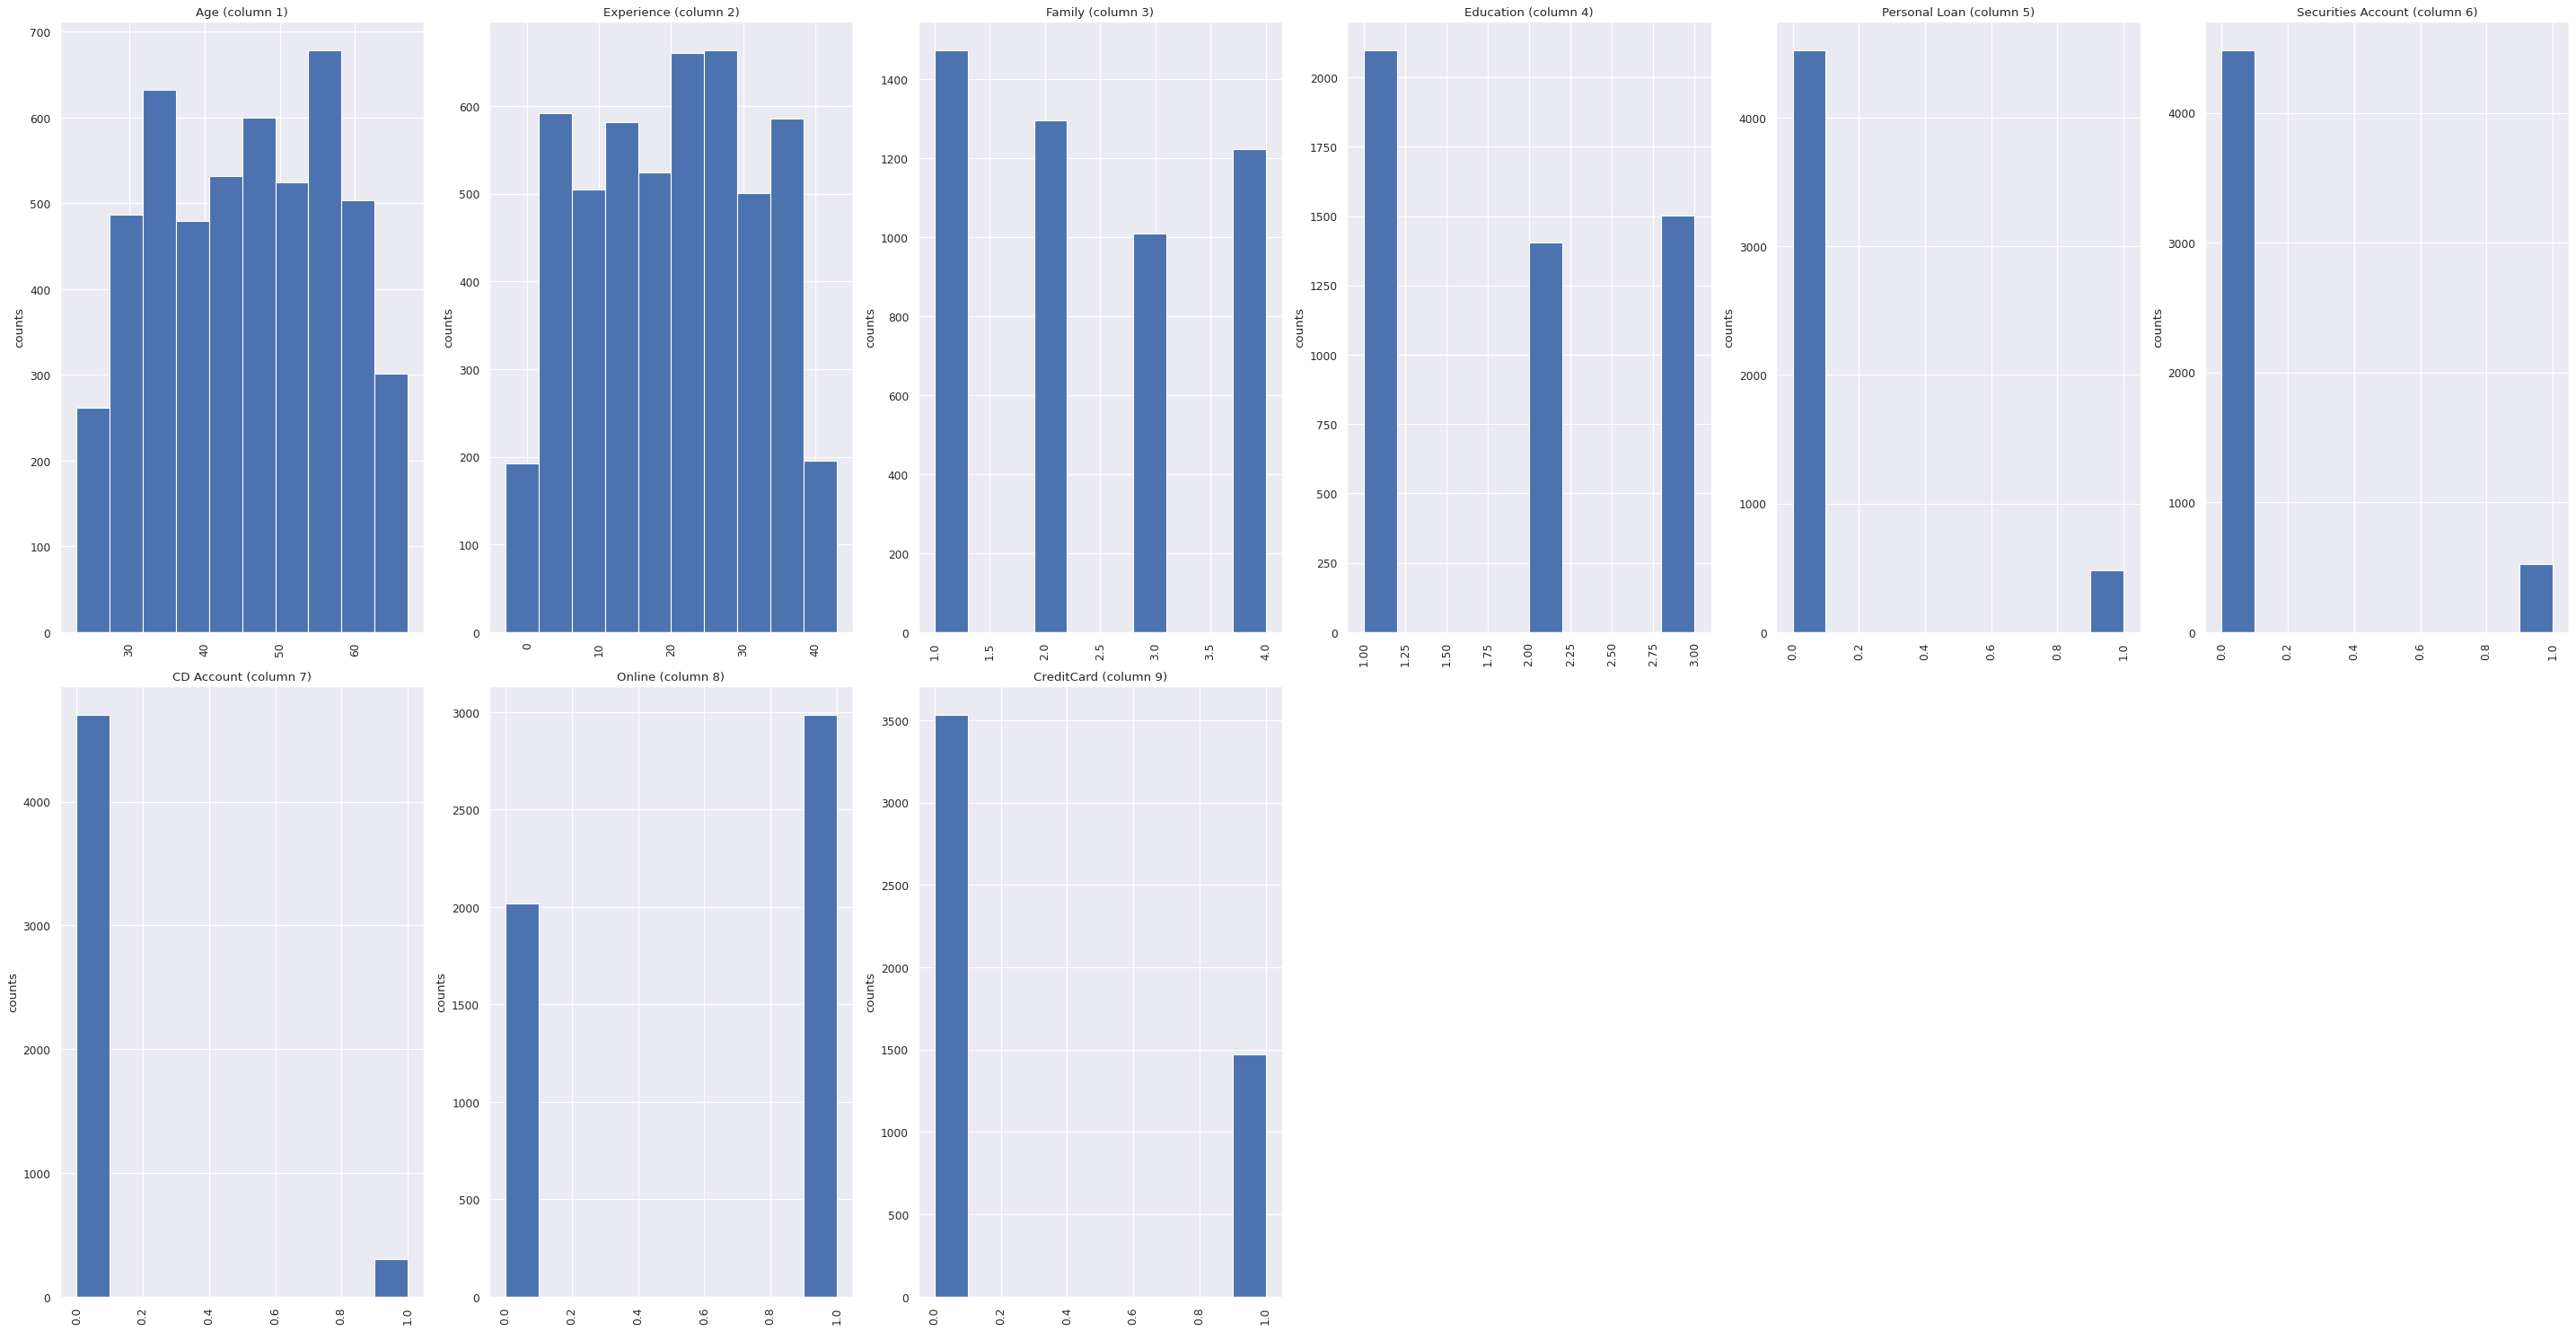

In [ ]:
plotPerColumnDistribution(df, 10, 6)

In [ ]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

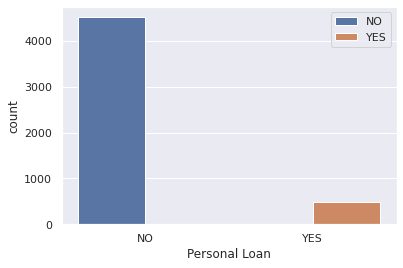

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.countplot(x="Personal Loan", data=df,hue="Personal Loan")

positions = (0,1)
labels = ("NO","YES")
plt.xticks(positions, labels)
plt.legend(labels)

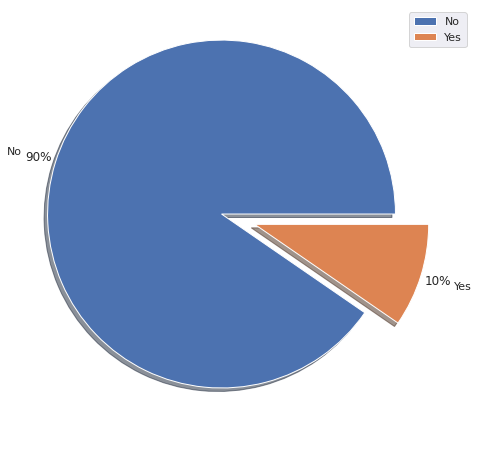

In [ ]:
list_pie = list(df["Personal Loan"].value_counts())
temp_list = []

labels = ["No","Yes"]
for pie in list_pie:
  temp_list.append((pie/df.shape[0])*100)
myexplode = [0.2, 0]

sizes = temp_list

fig = plt.figure(figsize =(10, 8)) 
plt.pie(sizes, labels = labels,explode = myexplode, shadow = True,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend()
plt.show() 

In [ ]:
df = df.drop(['ID','ZIP Code'],axis=1)

In [ ]:
df.rename(columns={"Personal Loan": "Personal_Loan","Securities Account":"Sec_Acc","CD Account":"CD_Acc"},inplace=True)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
df.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Sec_Acc', 'CD_Acc', 'Online',
       'CreditCard'],
      dtype='object')

# Testing algorithms with imbalancing data


In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split

In [ ]:
X = df[[i  for i in df.columns if i != 'Personal_Loan']]
Y = df['Personal_Loan']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

## SVM linear

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
svm_linear = svm.SVC(kernel='linear').fit(X_train, y_train)

In [ ]:
y_pred_svm_linear = svm_linear.predict(X_test)
y_pred_svm_linear

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
from sklearn import metrics

def result(y_test,y_pred):
  print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
  print("Precision:",metrics.precision_score(y_test, y_pred))
  print("Recall:",metrics.recall_score(y_test, y_pred))
  print("F1 score:",metrics.f1_score(y_test,y_pred))

result(y_test,y_pred_svm_linear)

Accuracy: 0.953
Precision: 0.9142857142857143
Recall: 0.6095238095238096
F1 score: 0.7314285714285714


In [ ]:
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt


def plotConfusionMatrix(type_model):
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]

  for title, normalize in titles_options:
      disp = plot_confusion_matrix(type_model, X_test, y_test,
                                  display_labels=["No","Yes"],
                                  cmap=plt.cm.Blues,
                                  normalize=normalize)
      disp.ax_.set_title(title)

      print(title)
      print(disp.confusion_matrix)

  plt.show()

Confusion matrix, without normalization
[[889   6]
 [ 41  64]]
Normalized confusion matrix
[[0.99 0.01]
 [0.39 0.61]]


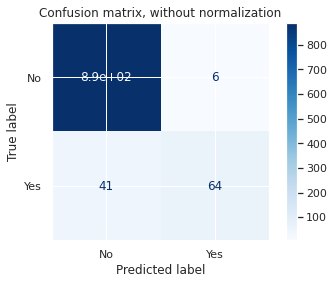

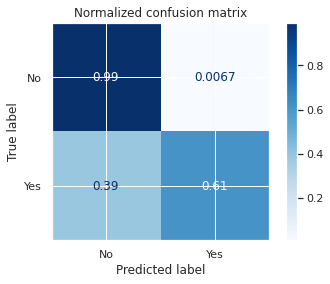

In [ ]:
plotConfusionMatrix(svm_linear)

## SVM non linear

In [ ]:
svm_poly = svm.SVC(kernel='poly', C=100, gamma='auto', degree=3,
               coef0=1).fit(X_train, y_train)

In [ ]:
y_pred_svm_poly = svm_poly.predict(X_test)
y_pred_svm_poly

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result(y_test,y_pred_svm_poly)

Accuracy: 0.984
Precision: 0.9320388349514563
Recall: 0.9142857142857143
F1 score: 0.9230769230769231


Confusion matrix, without normalization
[[888   7]
 [  9  96]]
Normalized confusion matrix
[[0.99 0.01]
 [0.09 0.91]]


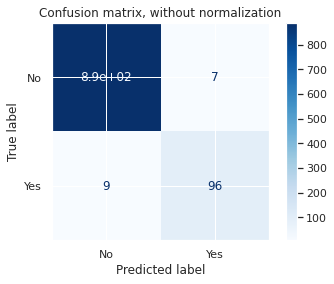

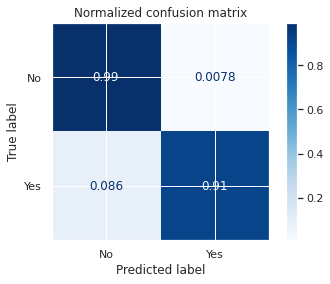

In [ ]:
plotConfusionMatrix(svm_poly)

## Logisitc Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_lg = lg.predict(X_test)
y_pred_lg

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result(y_test,y_pred_lg)

Accuracy: 0.954
Precision: 0.8554216867469879
Recall: 0.6761904761904762
F1 score: 0.7553191489361701


Confusion matrix, without normalization
[[883  12]
 [ 34  71]]
Normalized confusion matrix
[[0.99 0.01]
 [0.32 0.68]]


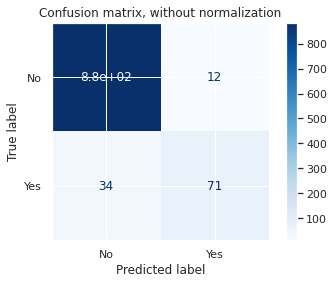

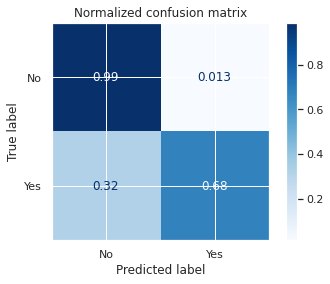

In [ ]:
plotConfusionMatrix(lg)

## Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred_nb = NB.predict(X_test)
y_pred_nb

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
result(y_test,y_pred_nb)

Accuracy: 0.894
Precision: 0.49612403100775193
Recall: 0.6095238095238096
F1 score: 0.547008547008547


Confusion matrix, without normalization
[[830  65]
 [ 41  64]]
Normalized confusion matrix
[[0.93 0.07]
 [0.39 0.61]]


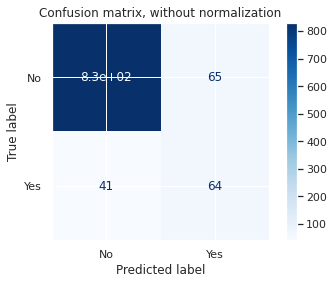

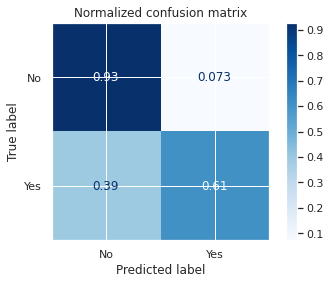

In [ ]:
plotConfusionMatrix(NB)

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
dtc = tree.DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y_pred_dtc = dtc.predict(X_test)
y_pred_dtc

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result(y_test,y_pred_dtc)

Accuracy: 0.988
Precision: 0.9514563106796117
Recall: 0.9333333333333333
F1 score: 0.9423076923076923


Confusion matrix, without normalization
[[890   5]
 [  7  98]]
Normalized confusion matrix
[[0.99 0.01]
 [0.07 0.93]]


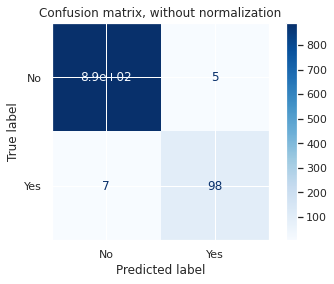

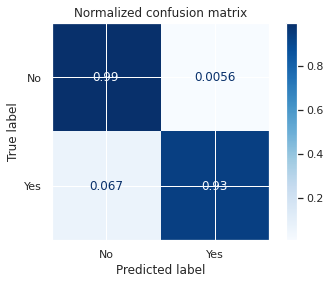

In [ ]:
plotConfusionMatrix(dtc)

# Result of imbalancing data

In [ ]:
y_pred_list = [y_pred_svm_linear,y_pred_svm_poly,y_pred_lg,y_pred_nb,y_pred_dtc]

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
def cal_score(score,y_pred_list):
  score = score.lower()
  f1_list = ['f1','f1 score','f1_score']
  plot_list = []
  for y_pred in y_pred_list:
    if score == 'accuracy':
        plot_list.append(round(accuracy_score(y_test,y_pred)*100,2))
    elif score == 'precision':
        plot_list.append(round(precision_score(y_test,y_pred)*100,2))
    elif score == 'recall':
        plot_list.append(round(recall_score(y_test,y_pred)*100,2))
    elif score in f1_list:
        plot_list.append(round(f1_score(y_test,y_pred)*100,2))
    else:
        raise TypeError("Score types are allowed is: Accucary, Precision, Recall, F1 Score")
  return plot_list

In [ ]:
def PlotBarAccuracy(plot_list,name):
  sns.set()
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_axes([0,0,1,1])
  algo_name = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
  ax.bar(algo_name,plot_list,color=("red", "green", "blue", "black", "pink"))
  plt.title("{} Score".format(name))
  plt.xlabel("Algorithm name")
  plt.ylabel("Percent")
  plt.xticks(rotation=45)

  for i in range(len(plot_list)):
      plt.annotate(str(plot_list[i]), xy=(algo_name[i],plot_list[i]), ha='center', va='bottom')
  plt.show()

### Accuracy

In [ ]:
accuracy_list = cal_score('Accuracy',y_pred_list)

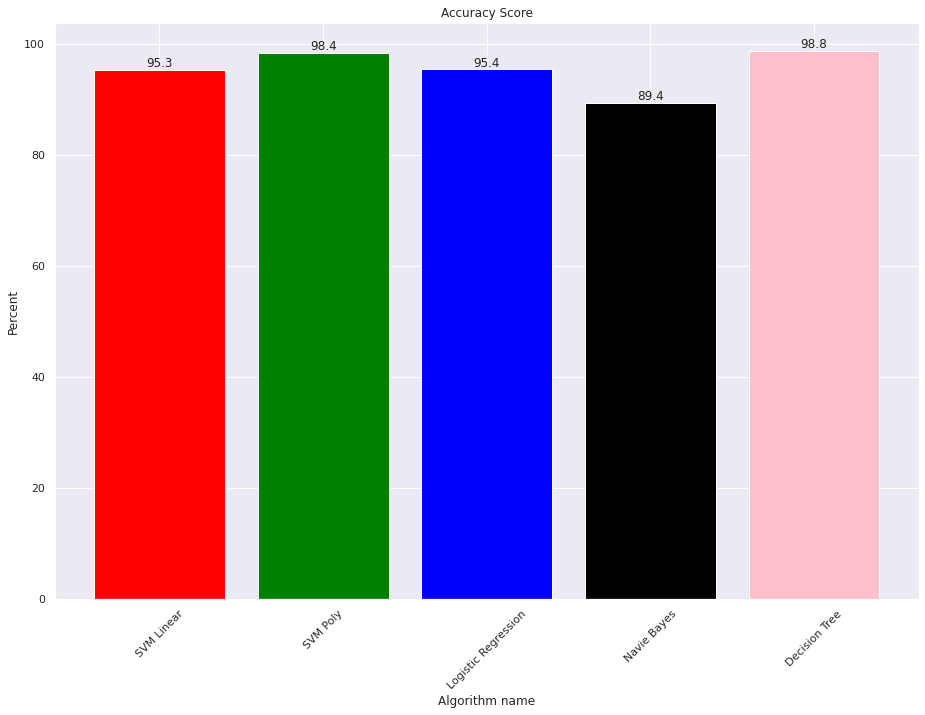

In [ ]:
PlotBarAccuracy(accuracy_list,'Accuracy')

### Precision

In [ ]:
precision_list = cal_score('precision',y_pred_list)

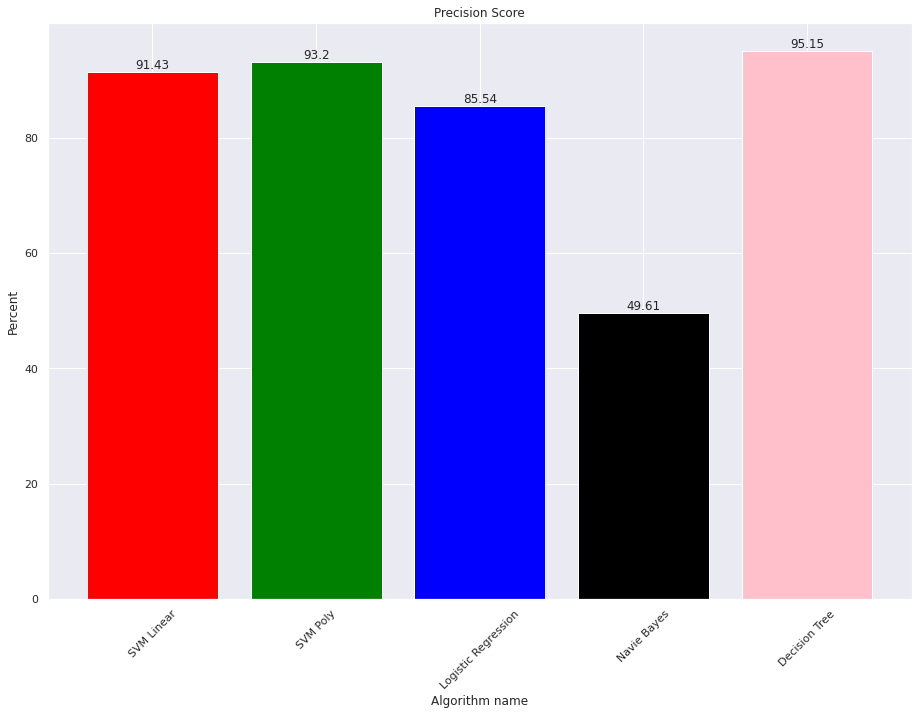

In [ ]:
PlotBarAccuracy(precision_list,'Precision')

### Recall

In [ ]:
recall_list = cal_score('recall',y_pred_list)

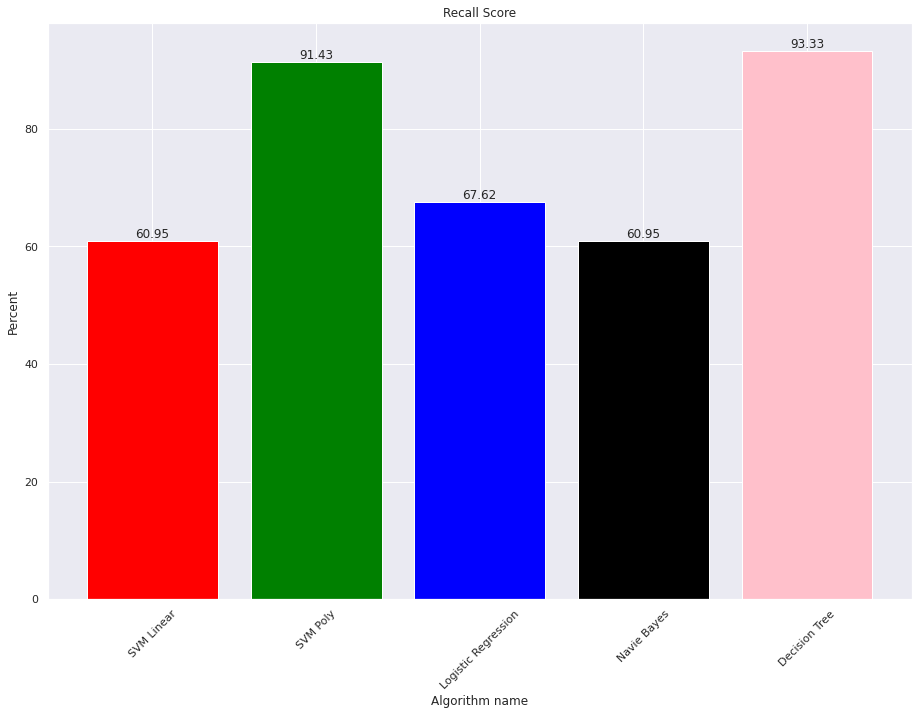

In [ ]:
PlotBarAccuracy(recall_list,'Recall')

### F1 Score

In [ ]:
f1_list = cal_score('f1 score',y_pred_list)

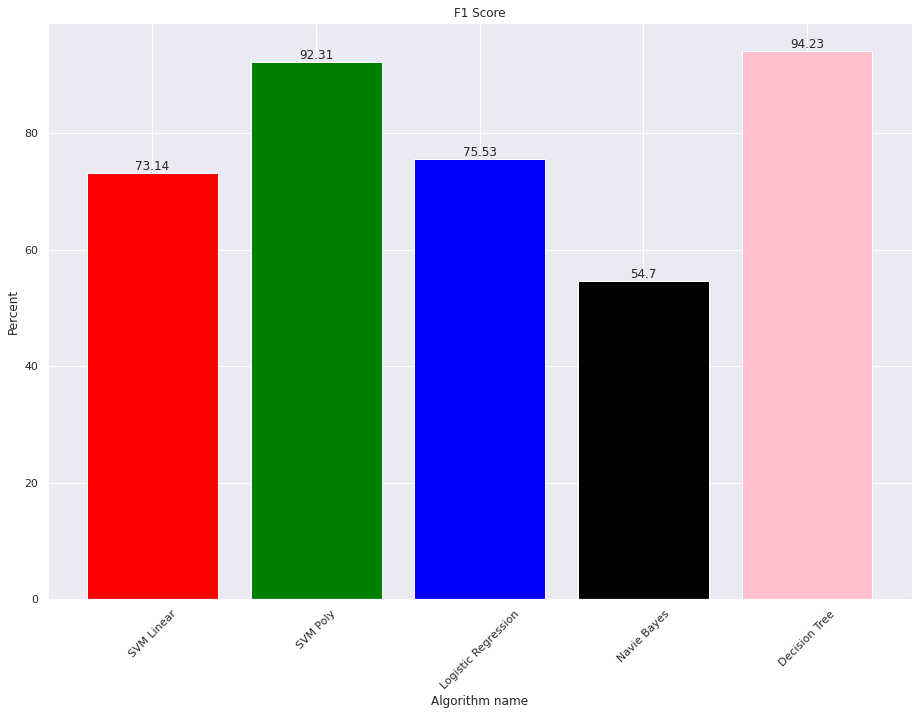

In [ ]:
PlotBarAccuracy(f1_list,'F1')

In [ ]:
tableData = np.array([accuracy_list,precision_list,recall_list,f1_list])
tableData.shape

(4, 5)

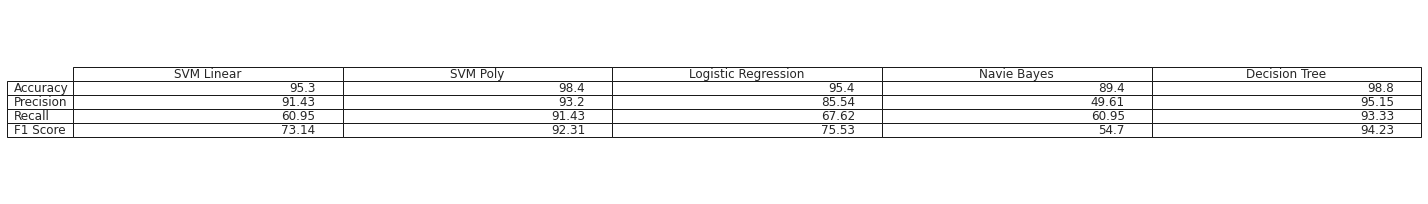

In [ ]:
columns = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
rowLabels = ['Accuracy','Precision','Recall','F1 Score']

fig = plt.figure(figsize=(20,3))
# hide axes
fig.patch.set_visible(True)
plt.axis('off')
plt.axis('tight')
plt.table(cellText=tableData,
                      rowLabels=rowLabels,
                      colLabels=columns,loc='center')
fig.tight_layout()
plt.savefig('table.png')
plt.show()

# Balancing data

In [ ]:
df.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,0,1,1


In [ ]:
df_per_0 = df[df['Personal_Loan'] == 0]
df_per_0.shape

(4520, 12)

In [ ]:
df_per_1 = df[df['Personal_Loan'] == 1]
df_per_1.shape

(480, 12)

In [ ]:
df_concat_1 = pd.concat([df_per_0,df_per_1])
df_concat_1

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Sec_Acc,CD_Acc,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4883,38,13,129,3,4.1,3,0,1,0,1,1,1
4927,43,19,121,1,0.7,2,0,1,0,1,1,1
4941,28,4,112,2,1.6,2,0,1,0,0,1,0
4962,46,20,122,3,3.0,3,0,1,0,1,1,1


In [ ]:
loc_increment = 0
df_list = []
for i in range(df_per_0.shape[0]//df_per_1.shape[0]):
  df_1 = df[df["Personal_Loan"] == 0].iloc[loc_increment:loc_increment + df_per_0.shape[0]//10]
  df_2 = df[df["Personal_Loan"] == 1]
  df_concat_2 = pd.concat([df_1,df_2])
  print("Fold number {}:".format(i+1),df_concat_2.shape)
  df_list.append(df_concat_2)
  loc_increment = loc_increment + df_per_0.shape[0]//df_per_1.shape[0]

Fold number 1: (932, 12)
Fold number 2: (932, 12)
Fold number 3: (932, 12)
Fold number 4: (932, 12)
Fold number 5: (932, 12)
Fold number 6: (932, 12)
Fold number 7: (932, 12)
Fold number 8: (932, 12)
Fold number 9: (932, 12)


## SVM Linear

In [ ]:
svm_linear_data_list = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_1)

  X_train_1 = scaler.transform(X_train_1)
  X_test_1 = scaler.transform(X_test_1)
  svm_linear_1 = svm.SVC(kernel='linear').fit(X_train_1, y_train_1)
  y_pred_1 = svm_linear_1.predict(X_test_1)
  
  svm_linear_data_list["accuracy"].append(accuracy_score(y_test_1,y_pred_1))
  svm_linear_data_list["precision"].append(precision_score(y_test_1,y_pred_1))
  svm_linear_data_list["recall"].append(recall_score(y_test_1,y_pred_1))
  svm_linear_data_list["f1_score"].append(f1_score(y_test_1,y_pred_1))

In [ ]:
import numpy as np

print(svm_linear_data_list)

{'accuracy': [0.9090909090909091, 0.9358288770053476, 0.9144385026737968, 0.9144385026737968, 0.93048128342246, 0.893048128342246, 0.9197860962566845, 0.93048128342246, 0.9197860962566845], 'precision': [0.8666666666666667, 0.91, 0.8679245283018868, 0.875, 0.8932038834951457, 0.8363636363636363, 0.8761904761904762, 0.900990099009901, 0.883495145631068], 'recall': [0.9680851063829787, 0.9680851063829787, 0.9787234042553191, 0.9680851063829787, 0.9787234042553191, 0.9787234042553191, 0.9787234042553191, 0.9680851063829787, 0.9680851063829787], 'f1_score': [0.9145728643216081, 0.9381443298969071, 0.9199999999999999, 0.9191919191919191, 0.934010152284264, 0.9019607843137255, 0.9246231155778896, 0.9333333333333335, 0.9238578680203046]}


## SVM No Linear

In [ ]:
svm_poly_data_list = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_2)

  X_train_2 = scaler.transform(X_train_2)
  X_test_2 = scaler.transform(X_test_2)
  svm_poly_2 = svm.SVC(kernel='poly', C=100, gamma='auto', degree=3,
               coef0=1).fit(X_train_2, y_train_2)
  y_pred_2 = svm_poly_2.predict(X_test_2)

  svm_poly_data_list["accuracy"].append(accuracy_score(y_test_2,y_pred_2))
  svm_poly_data_list["precision"].append(precision_score(y_test_2,y_pred_2))
  svm_poly_data_list["recall"].append(recall_score(y_test_2,y_pred_2))
  svm_poly_data_list["f1_score"].append(f1_score(y_test_2,y_pred_2))

In [ ]:
import numpy as np

print(svm_poly_data_list)

{'accuracy': [0.9411764705882353, 0.9625668449197861, 0.9625668449197861, 0.9197860962566845, 0.946524064171123, 0.9732620320855615, 0.9411764705882353, 0.9411764705882353, 0.946524064171123], 'precision': [0.9368421052631579, 0.9578947368421052, 0.9578947368421052, 0.8761904761904762, 0.9285714285714286, 0.968421052631579, 0.9108910891089109, 0.9191919191919192, 0.9285714285714286], 'recall': [0.9468085106382979, 0.9680851063829787, 0.9680851063829787, 0.9787234042553191, 0.9680851063829787, 0.9787234042553191, 0.9787234042553191, 0.9680851063829787, 0.9680851063829787], 'f1_score': [0.9417989417989417, 0.962962962962963, 0.962962962962963, 0.9246231155778896, 0.9479166666666666, 0.9735449735449735, 0.9435897435897436, 0.9430051813471503, 0.9479166666666666]}


## Logistic Regression

In [ ]:
lg_data_list = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_3)
  scaler.fit(X_test_3)

  X_train_3 = scaler.transform(X_train_3)
  X_test_3 = scaler.transform(X_test_3)
  lg_2 = LogisticRegression().fit(X_train_3, y_train_3)
  y_pred_3 = lg_2.predict(X_test_3)
  
  lg_data_list["accuracy"].append(accuracy_score(y_test_3,y_pred_3))
  lg_data_list["precision"].append(precision_score(y_test_3,y_pred_3))
  lg_data_list["recall"].append(recall_score(y_test_3,y_pred_3))
  lg_data_list["f1_score"].append(f1_score(y_test_3,y_pred_3))

In [ ]:
print(lg_data_list)

{'accuracy': [0.9197860962566845, 0.9358288770053476, 0.9251336898395722, 0.9144385026737968, 0.9358288770053476, 0.8983957219251337, 0.9090909090909091, 0.9518716577540107, 0.9144385026737968], 'precision': [0.883495145631068, 0.91, 0.8921568627450981, 0.875, 0.91, 0.8440366972477065, 0.8666666666666667, 0.9381443298969072, 0.8823529411764706], 'recall': [0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9680851063829787, 0.9787234042553191, 0.9680851063829787, 0.9680851063829787, 0.9574468085106383], 'f1_score': [0.9238578680203046, 0.9381443298969071, 0.9285714285714286, 0.9191919191919191, 0.9381443298969071, 0.9064039408866995, 0.9145728643216081, 0.9528795811518325, 0.9183673469387754]}


## Naive Bayes

In [ ]:
nb_data_list = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_4)
  scaler.fit(X_test_4)

  X_train_4 = scaler.transform(X_train_4)
  X_test_4 = scaler.transform(X_test_4)
  NB_2 = GaussianNB().fit(X_train_4, y_train_4)
  y_pred_4 = lg_2.predict(X_test_4)
  
  nb_data_list["accuracy"].append(accuracy_score(y_test_4,y_pred_4))
  nb_data_list["precision"].append(precision_score(y_test_4,y_pred_4))
  nb_data_list["recall"].append(recall_score(y_test_4,y_pred_4))
  nb_data_list["f1_score"].append(f1_score(y_test_4,y_pred_4))

In [ ]:
print(nb_data_list)

{'accuracy': [0.9251336898395722, 0.9251336898395722, 0.9251336898395722, 0.9197860962566845, 0.93048128342246, 0.8983957219251337, 0.9144385026737968, 0.9411764705882353, 0.9144385026737968], 'precision': [0.9, 0.9, 0.9, 0.8910891089108911, 0.9090909090909091, 0.8571428571428571, 0.8823529411764706, 0.9278350515463918, 0.8823529411764706], 'recall': [0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383, 0.9574468085106383], 'f1_score': [0.9278350515463918, 0.9278350515463918, 0.9278350515463918, 0.9230769230769231, 0.9326424870466321, 0.9045226130653266, 0.9183673469387754, 0.9424083769633509, 0.9183673469387754]}


## Decision Tree

In [ ]:
dct_data_list = {
    "accuracy":[],
    "precision":[],
    "recall":[],
    "f1_score":[]
}
for i in range(len(df_list)):
  df_i = df_list[i]
  X = df_i[[i  for i in df.columns if i != 'Personal_Loan']]
  Y = df_i['Personal_Loan']
  X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X,Y,test_size=0.2,random_state=42)
  scaler = StandardScaler()
  scaler.fit(X_train_5)
  scaler.fit(X_test_5)

  X_train_5 = scaler.transform(X_train_5)
  X_test_5 = scaler.transform(X_test_5)
  DCT_2 = tree.DecisionTreeClassifier(random_state=42).fit(X_train_5, y_train_5)
  y_pred_5 = DCT_2.predict(X_test_5)
  
  dct_data_list["accuracy"].append(accuracy_score(y_test_5,y_pred_5))
  dct_data_list["precision"].append(precision_score(y_test_5,y_pred_5))
  dct_data_list["recall"].append(recall_score(y_test_5,y_pred_5))
  dct_data_list["f1_score"].append(f1_score(y_test_5,y_pred_5))

In [ ]:
print(dct_data_list)

{'accuracy': [0.9732620320855615, 0.9786096256684492, 0.9518716577540107, 0.9518716577540107, 0.9732620320855615, 0.9732620320855615, 0.9572192513368984, 0.946524064171123, 0.9732620320855615], 'precision': [0.968421052631579, 0.9591836734693877, 0.9207920792079208, 0.9381443298969072, 0.989010989010989, 0.968421052631579, 0.93, 0.9285714285714286, 0.968421052631579], 'recall': [0.9787234042553191, 1.0, 0.9893617021276596, 0.9680851063829787, 0.9574468085106383, 0.9787234042553191, 0.9893617021276596, 0.9680851063829787, 0.9787234042553191], 'f1_score': [0.9735449735449735, 0.9791666666666666, 0.9538461538461538, 0.9528795811518325, 0.972972972972973, 0.9735449735449735, 0.9587628865979382, 0.9479166666666666, 0.9735449735449735]}


# Visualize differences between 2 methods

In [ ]:
def cal_score_balance(name):
  cal_score = [round(np.mean(svm_linear_data_list["{}".format(name)])*100,2),round(np.mean(svm_poly_data_list["{}".format(name)])*100,2),
                        round(np.mean(lg_data_list["{}".format(name)])*100,2),round(np.mean(nb_data_list["{}".format(name)])*100,2),
                        round(np.mean(dct_data_list["{}".format(name)])*100,2)]
  return cal_score

In [ ]:
def VisualDiffenceMethod(y_pred_list,name):
  name = name.lower()
  try:
    labels = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
    accuracy_list_1 = cal_score(name,y_pred_list)
    accuracy_list_2 = cal_score_balance(name)
  except KeyError:
    raise TypeError("Score types are allowed is: Accucary, Precision, Recall, F1 Score")
  x = np.arange(len(labels))  # the label locations
  width = 0.35  # the width of the bars

  plt.figure(figsize=(20,12))
  rects1 = plt.bar(x - width/2, accuracy_list_1, width, label='Imbalance')
  rects2 = plt.bar(x + width/2, accuracy_list_2, width, label='Balance')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  plt.ylabel('Percent')
  plt.title('{} Scores between imbalance and balance'.format(name.capitalize() ))
  plt.xticks(x,labels)
  plt.legend(loc='lower right')


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          plt.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)
  plt.savefig('difference_{}.png'.format(name))
  plt.show()

## Accuracy

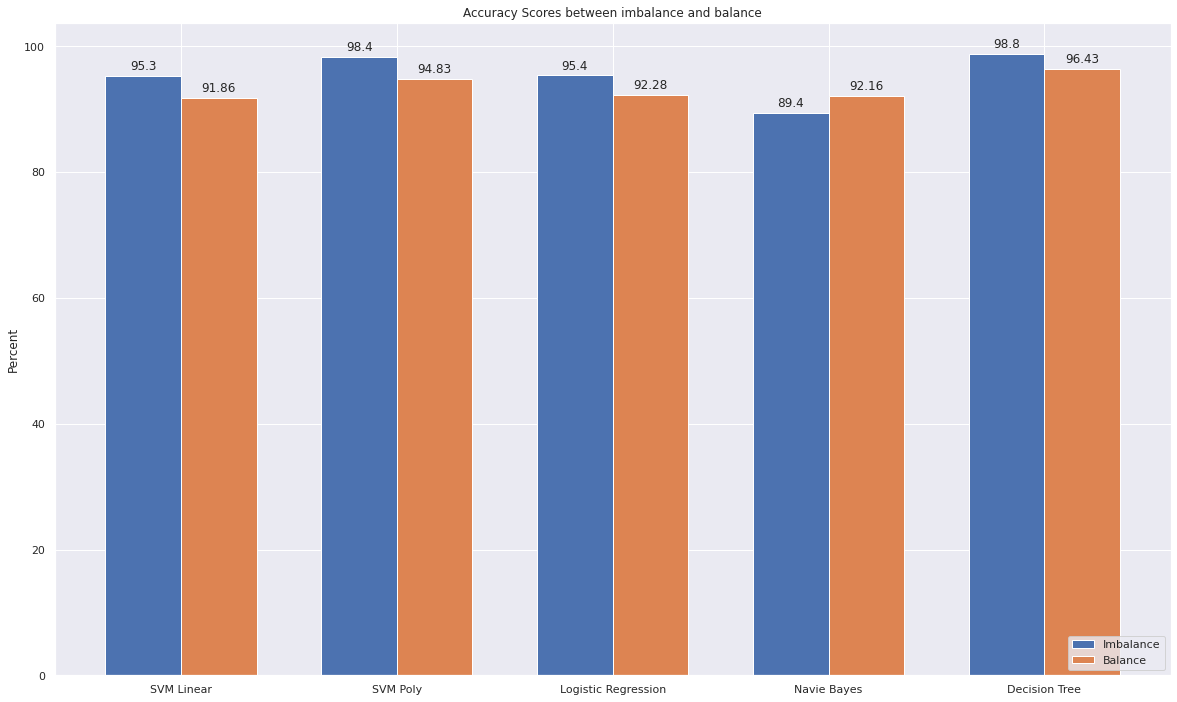

In [ ]:
VisualDiffenceMethod(y_pred_list,"accuracy")

## Precision

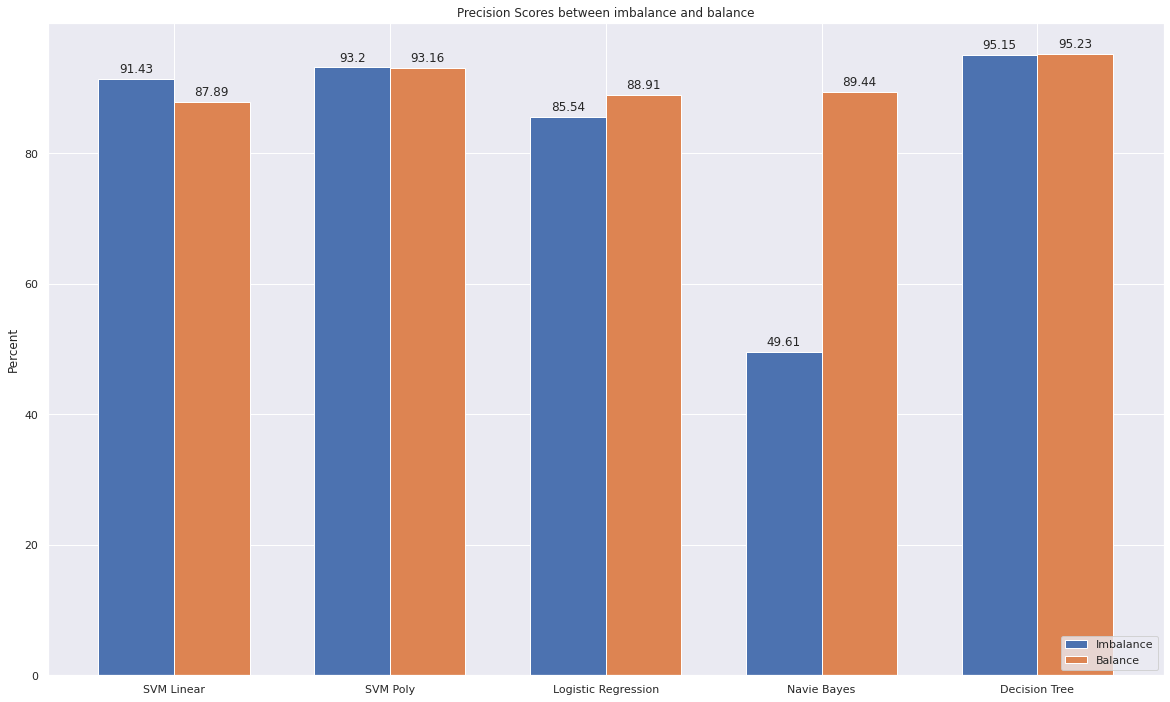

In [ ]:
VisualDiffenceMethod(y_pred_list,"precision")

## Recall

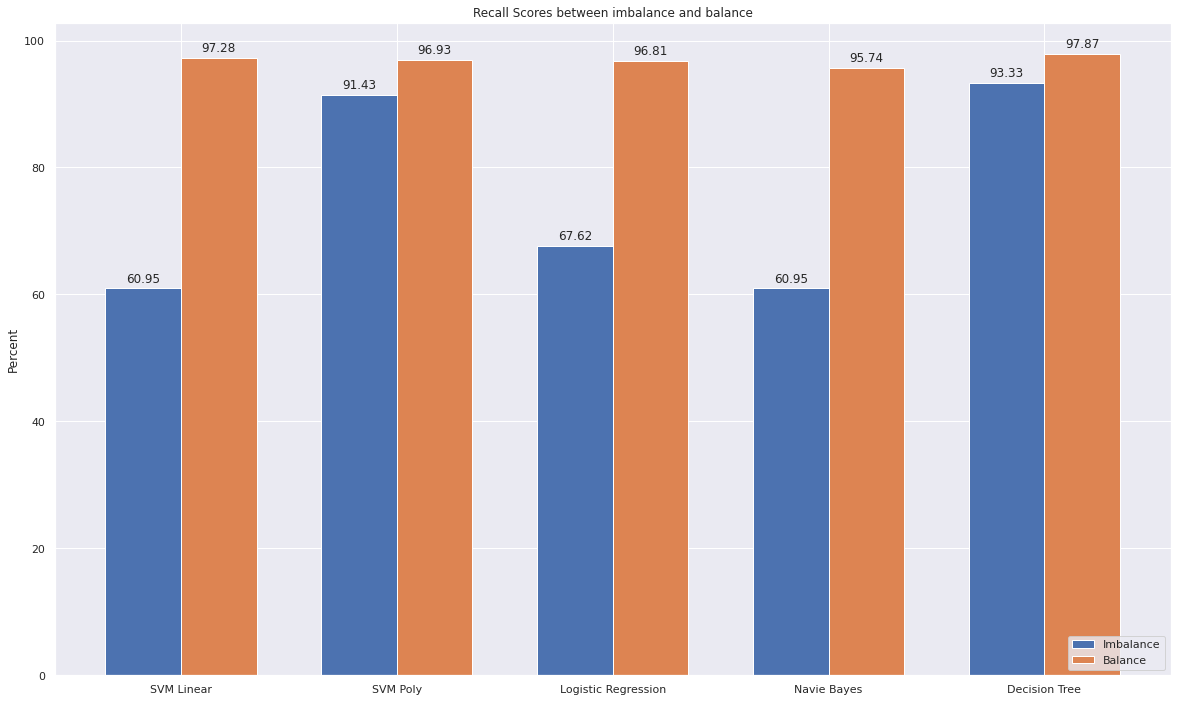

In [ ]:
VisualDiffenceMethod(y_pred_list,"recall")

## F1 Score

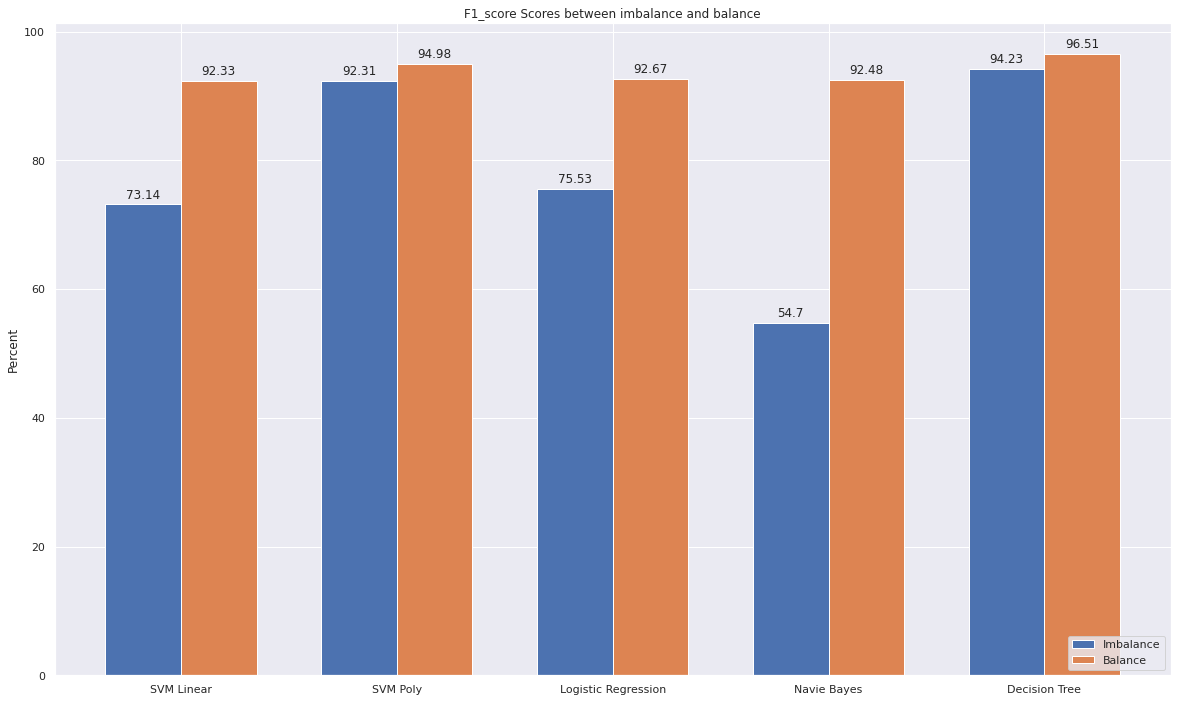

In [ ]:
VisualDiffenceMethod(y_pred_list,"f1_score")

# Result of balacing data

In [ ]:
tableData_1 = np.array([cal_score_balance("accuracy"),cal_score_balance("precision"),cal_score_balance("recall"),cal_score_balance("f1_score")])
tableData_1.shape

(4, 5)

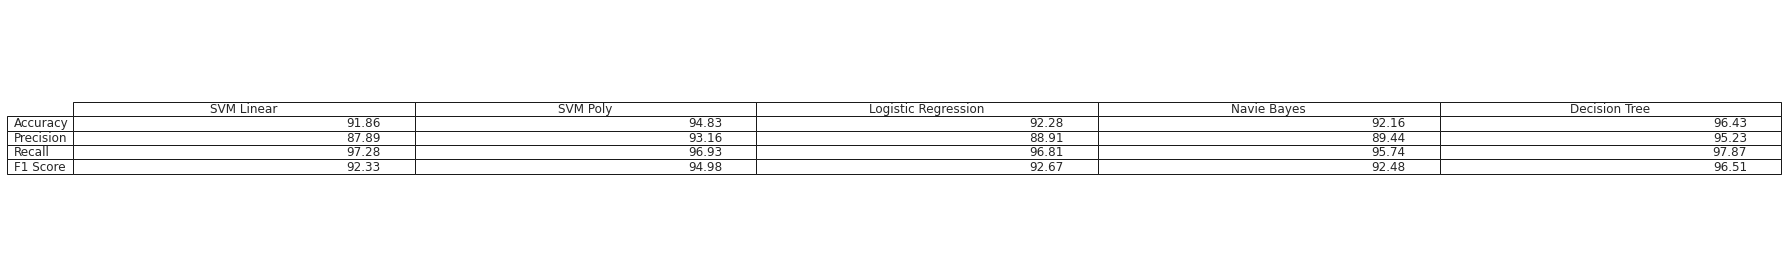

In [ ]:
columns = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']
rowLabels = ['Accuracy','Precision','Recall','F1 Score']

fig = plt.figure(figsize=(25,4))
# hide axes
fig.patch.set_visible(True)
plt.axis('off')
plt.axis('tight')
plt.table(cellText=tableData_1,
                      rowLabels=rowLabels,
                      colLabels=columns,loc='center')
fig.tight_layout()
plt.savefig('table_balance.png')
plt.show()

# Using PCA 

In [ ]:
from sklearn import svm

In [ ]:
X_pca = df[[i  for i in df.columns if i != 'Personal_Loan']]
Y_pca = df['Personal_Loan']
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,Y_pca,test_size=0.2,random_state=42)

## 2D

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_temp = pca.fit_transform(X_train_pca)
X_test_temp = pca.fit_transform(X_test_pca)

In [ ]:
y_train_temp = y_train_pca.to_numpy().reshape(y_train.shape[0],1)
y_train_temp.shape

(4000, 1)

In [ ]:
data_set_temp = np.concatenate([X_train_temp,y_train_temp],axis=1)
data_set_Df = pd.DataFrame(data = data_set_temp
             , columns = ['principal component 1', 'principal component 2','y'])

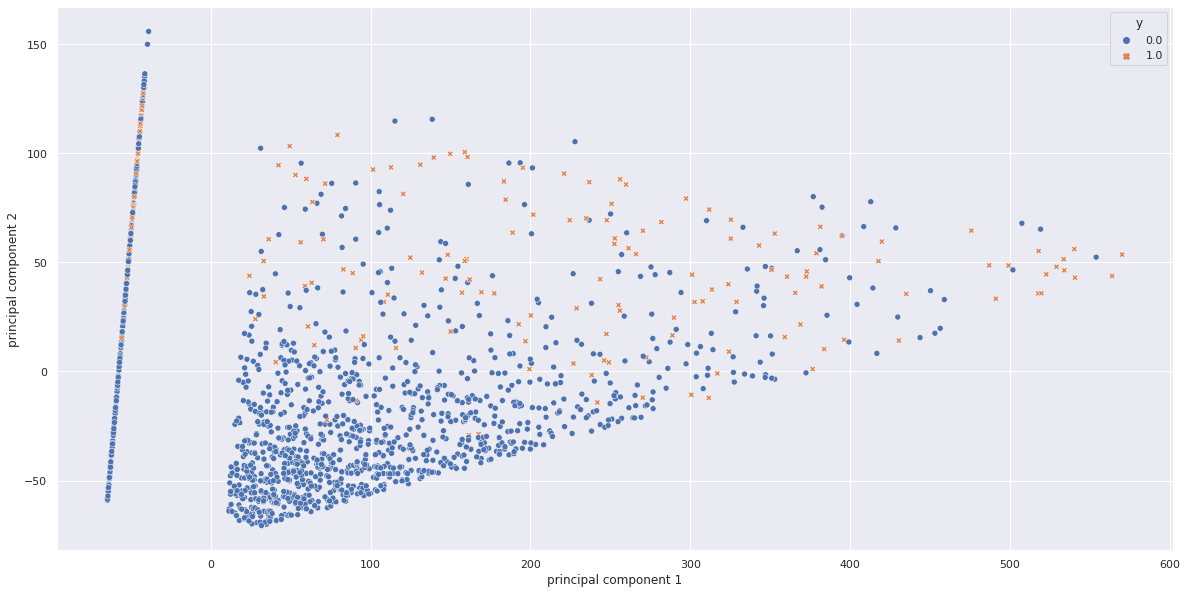

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    data=data_set_Df,
    style="y",
    legend="full"
)

plt.show()

### SVM Linear

- Sau khi trực quan hóa dữ liệu lên, em nhận thấy phân bố dữ liệu không thể sử dụng SVM dạng tuyến tính được vì các điểm phân bố không đều nhau

### SVM No Linear

In [ ]:
svm_poly_2 = svm.SVC(kernel='poly').fit(X_train_temp, y_train_pca)
y_pred_pca_1 = svm_poly_2.predict(X_test_temp)

In [ ]:
result(y_test_pca,y_pred_pca_1)

Accuracy: 0.893
Precision: 0.4
Recall: 0.0380952380952381
F1 score: 0.06956521739130436


### Logistic Regression

In [ ]:
lg_pca = LogisticRegression().fit(X_train_temp, y_train_pca)
y_pred_pca_2 = lg_pca.predict(X_test_temp)

In [ ]:
result(y_test_pca,y_pred_pca_2)

Accuracy: 0.911
Precision: 0.6379310344827587
Recall: 0.3523809523809524
F1 score: 0.45398773006134974


### Navie Bayes

In [ ]:
NB_pca = GaussianNB().fit(X_train_temp, y_train_pca)
y_pred_pca_3 = NB_pca.predict(X_test_temp)

In [ ]:
result(y_test_pca,y_pred_pca_3)

Accuracy: 0.913
Precision: 0.618421052631579
Recall: 0.44761904761904764
F1 score: 0.5193370165745856


### Decision Tree

In [ ]:
DCT_pca = tree.DecisionTreeClassifier(random_state=42).fit(X_train_temp, y_train_pca)
y_pred_pca_4 = DCT_pca.predict(X_test_temp)

In [ ]:
result(y_test_pca,y_pred_pca_4)

Accuracy: 0.884
Precision: 0.44660194174757284
Recall: 0.4380952380952381
F1 score: 0.44230769230769235


# Visualize differences all methods

In [ ]:
y_pred_pca = [y_pred_pca_1,y_pred_pca_2,y_pred_pca_3,y_pred_pca_4]

In [ ]:
def VisualAllMethod(y_pred_list,y_pred_pca,name):
  name = name.lower()
  try:
    labels = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree']

    accuracy_list_1 = cal_score(name,y_pred_list)
    accuracy_list_2 = cal_score_balance(name)
    accuracy_list_3 = cal_score(name,y_pred_pca)
    accuracy_list_3.insert(0,0)
  except KeyError:
    raise TypeError("Score types are allowed is: Accucary, Precision, Recall, F1 Score")
  x = np.arange(len(labels))  # the label locations
  width = 0.25  # the width of the bars

  plt.figure(figsize=(22,16))
  rects1 = plt.bar(x - width, accuracy_list_1, width, label='Imbalance')
  rects2 = plt.bar(x + width/3, accuracy_list_2, width, label='Balance')
  rects3 = plt.bar(x - width/4, accuracy_list_3, width, label='PCA')

  # Add some text for labels, title and custom x-axis tick labels, etc.
  plt.ylabel('Percent')
  plt.title('{} Scores between imbalance and balance and pca'.format(name.capitalize() ))
  plt.xticks(x,labels)
  plt.legend(loc='lower right')


  def autolabel(rects):
      """Attach a text label above each bar in *rects*, displaying its height."""
      for rect in rects:
          height = rect.get_height()
          plt.annotate('{}'.format(height),
                      xy=(rect.get_x() + rect.get_width() / 2, height),
                      xytext=(0, 3),  # 3 points vertical offset
                      textcoords="offset points",
                      ha='center', va='bottom')


  autolabel(rects1)
  autolabel(rects2)
  autolabel(rects3)

  plt.savefig('difference_{}_all.png'.format(name))
  plt.show()

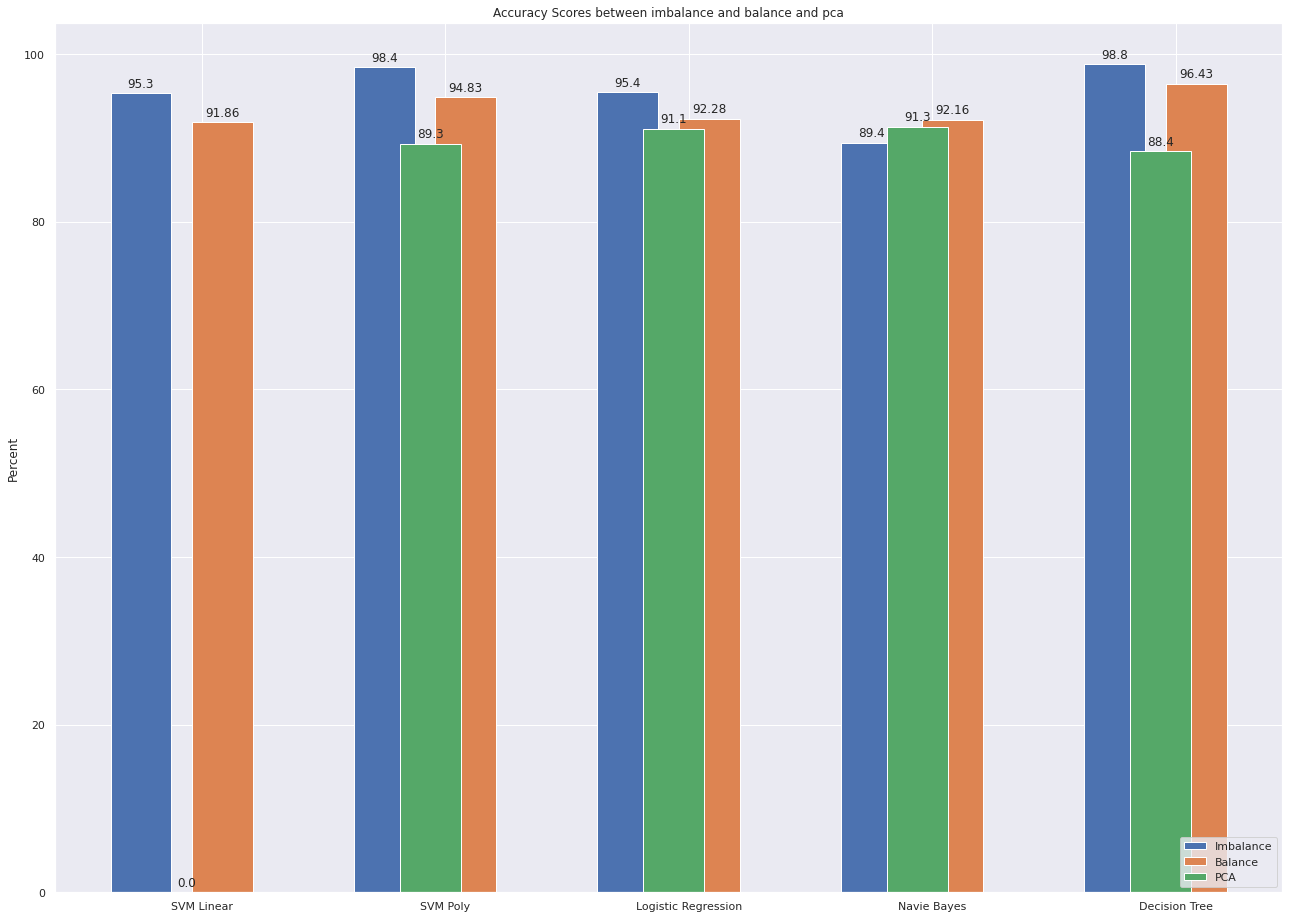

In [ ]:
VisualAllMethod(y_pred_list,y_pred_pca,"accuracy")

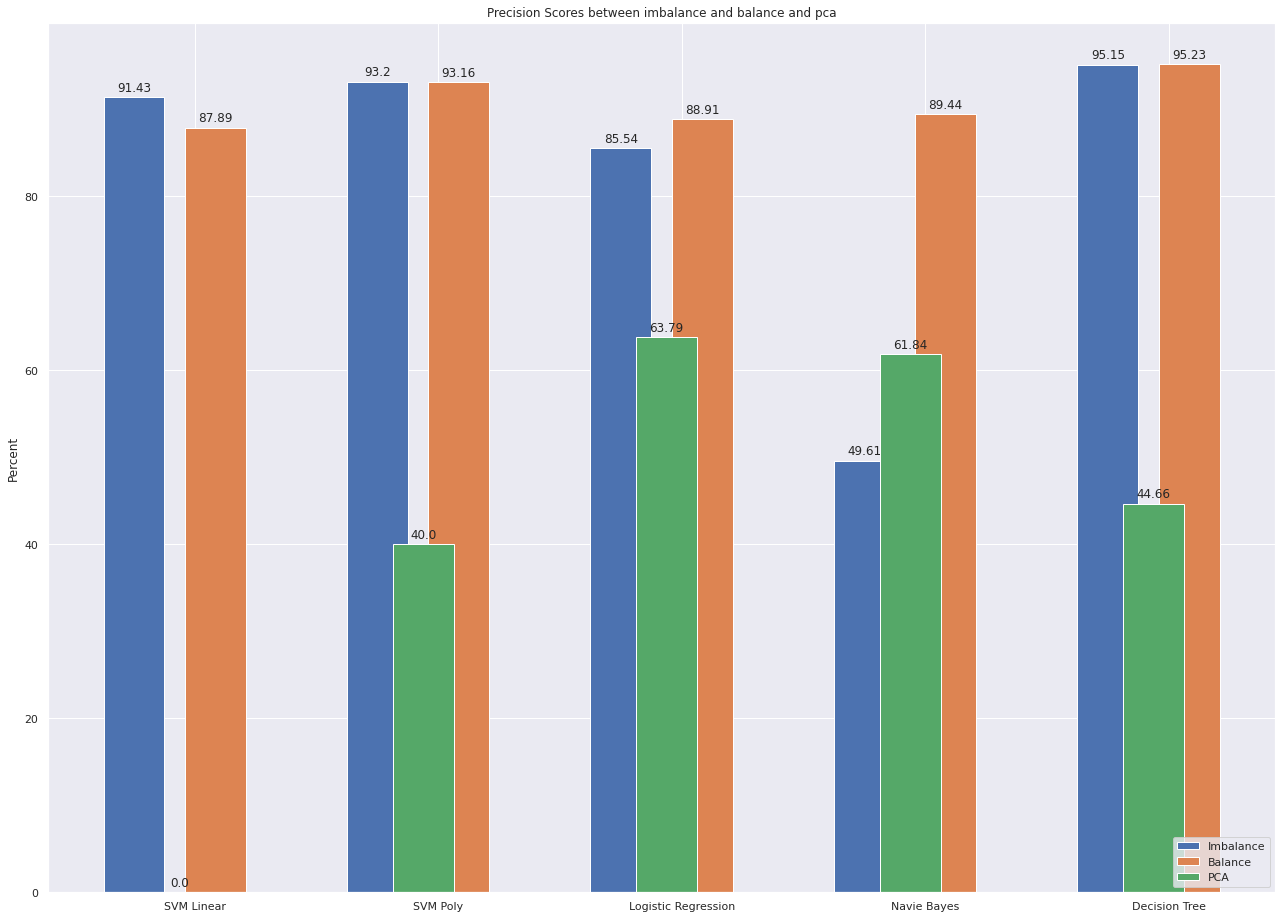

In [ ]:
VisualAllMethod(y_pred_list,y_pred_pca,"Precision")

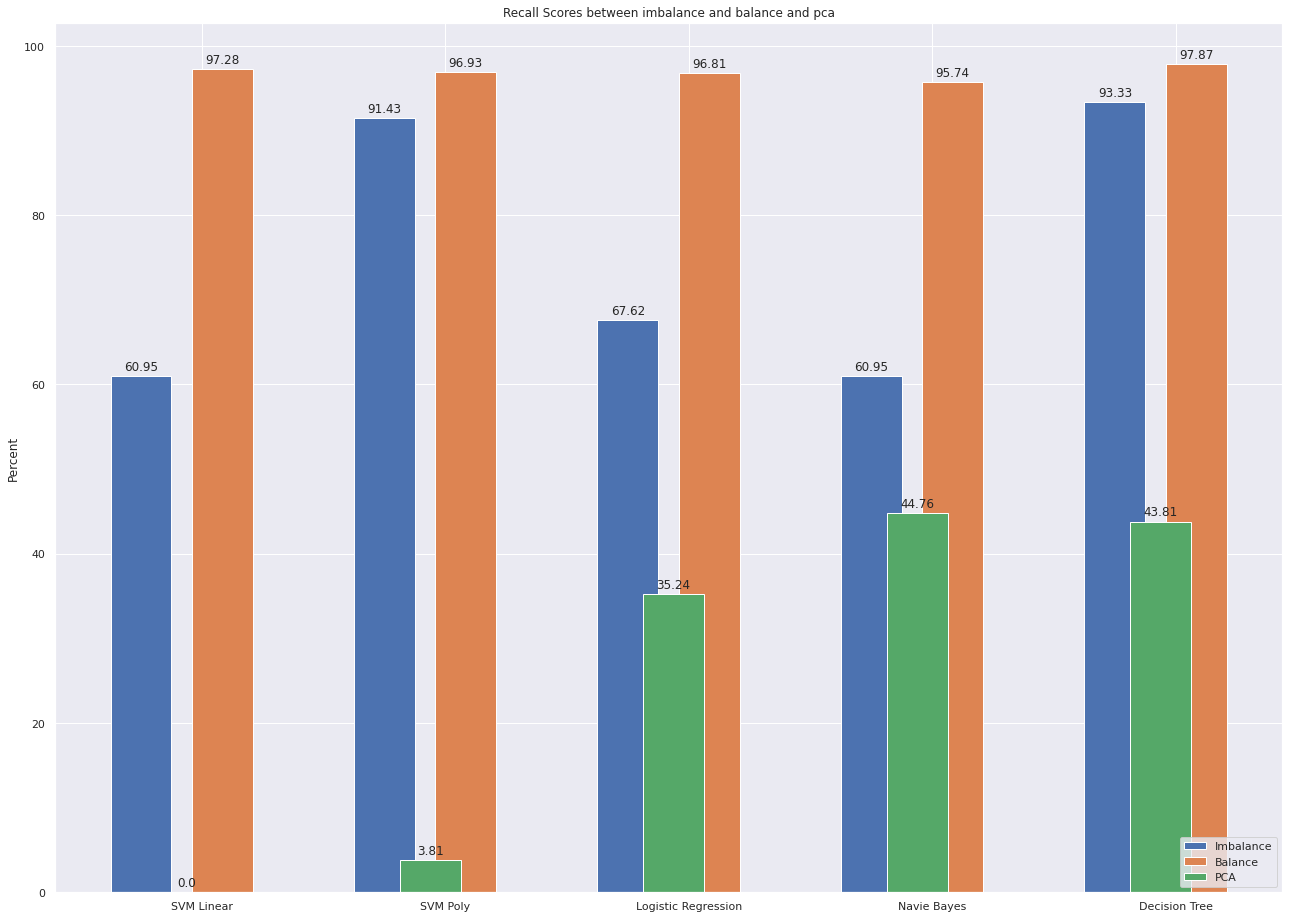

In [ ]:
VisualAllMethod(y_pred_list,y_pred_pca,"Recall")

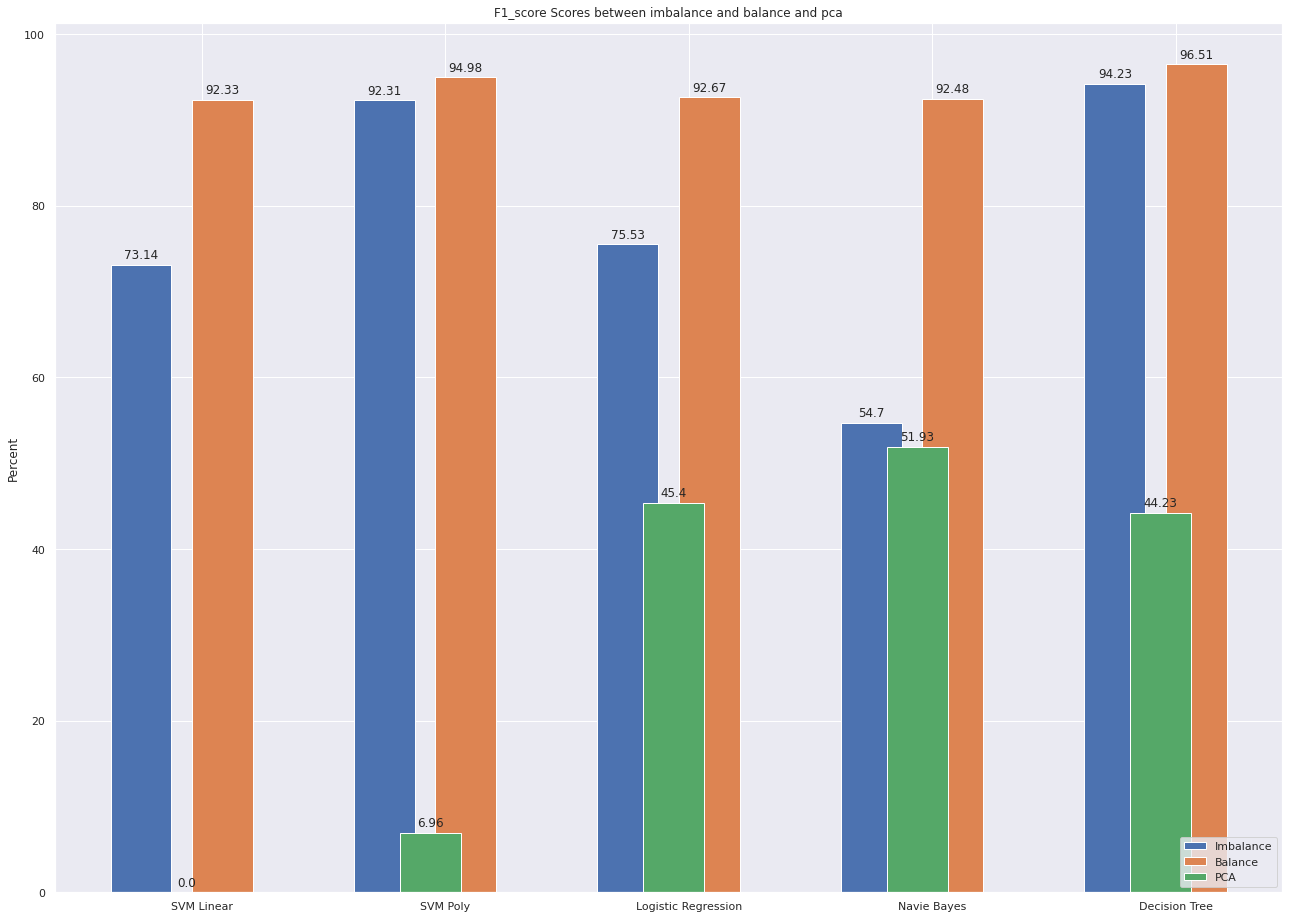

In [ ]:
VisualAllMethod(y_pred_list,y_pred_pca,"f1_score")

# Neural Network

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(6, activation='sigmoid'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 11)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
125/125 [==============================] - 1s 1ms/step - loss: 0.7447 - accuracy: 0.3665
Epoch 2/200
125/125 [==============================] - 0s 972us/step - loss: 0.6299 - accuracy: 0.9121
Epoch 3/200
125/125 [==============================] - 0s 978us/step - loss: 0.5893 - accuracy: 0.8989
Epoch 4/200
125/125 [==============================] - 0s 964us/step - loss: 0.5475 - accuracy: 0.9044
Epoch 5/200
125/125 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.9095
Epoch 6/200
125/125 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.9097
Epoch 7/200
125/125 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.9251
Epoch 8/200
125/125 [==============================] - 0s 994us/step - loss: 0.4026 - accuracy: 0.9276
Epoch 9/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3646 - accuracy: 0.9481
Epoch 10/200
125/125 [==============================] - 0s 1ms/step - loss: 0.3383 

In [ ]:
y_pred_ann = model.predict(X_test)

In [ ]:
rounded = [round(x[0]) for x in y_pred_ann]
y_pred_ann = np.array(rounded)

In [ ]:
y_pred_ann = np.array(y_pred_ann)
accuracy_score(y_test,y_pred_ann)

0.984

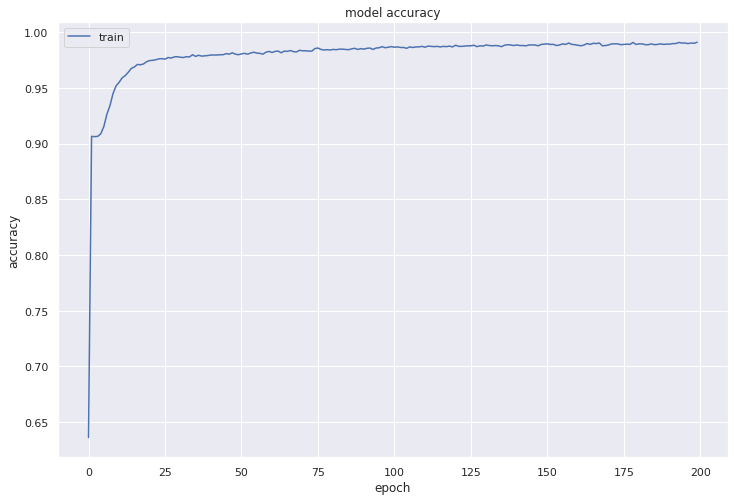

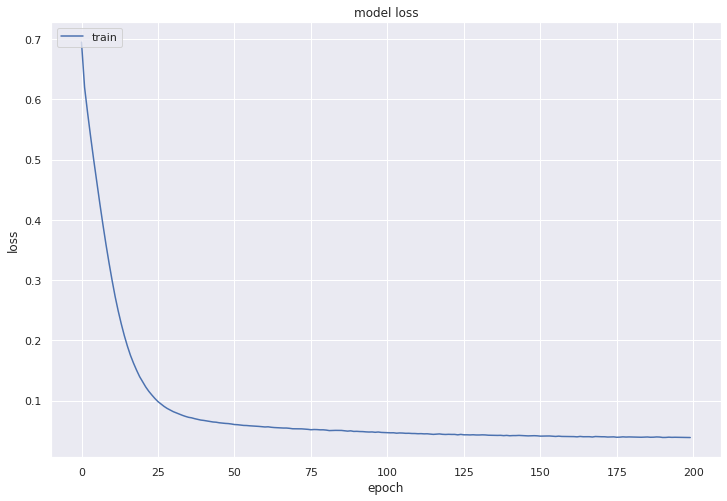

In [ ]:
# summarize history for accuracy
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss.png')
plt.show()


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBM_model = GradientBoostingClassifier(n_estimators=50,
                                       learning_rate=0.3,
                                       subsample=0.8)

In [ ]:
GBM_model.fit(X=X_train, y=y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gtest_pred = GBM_model.predict(X_test)

accuracy_score(y_test, gtest_pred)

0.99

In [ ]:
y_pred_list.append(gtest_pred)

In [ ]:
new_pred_list = y_pred_list

In [ ]:
new_accuracy_list = cal_score('Accuracy',new_pred_list)

In [ ]:
def NewPlotBarAccuracy(plot_list,name):
  sns.set()
  fig = plt.figure(figsize=(12, 8))
  ax = fig.add_axes([0,0,1,1])
  algo_name = ['SVM Linear', 'SVM Poly', 'Logistic Regression', 'Navie Bayes', 'Decision Tree','Gradient Boosting']
  ax.bar(algo_name,plot_list,color=("red", "green", "blue", "black", "pink","yellow"))
  plt.title("{} Score".format(name))
  plt.xlabel("Algorithm name")
  plt.ylabel("Percent")
  plt.xticks(rotation=45)

  for i in range(len(plot_list)):
      plt.annotate(str(plot_list[i]), xy=(algo_name[i],plot_list[i]), ha='center', va='bottom')
  plt.show()

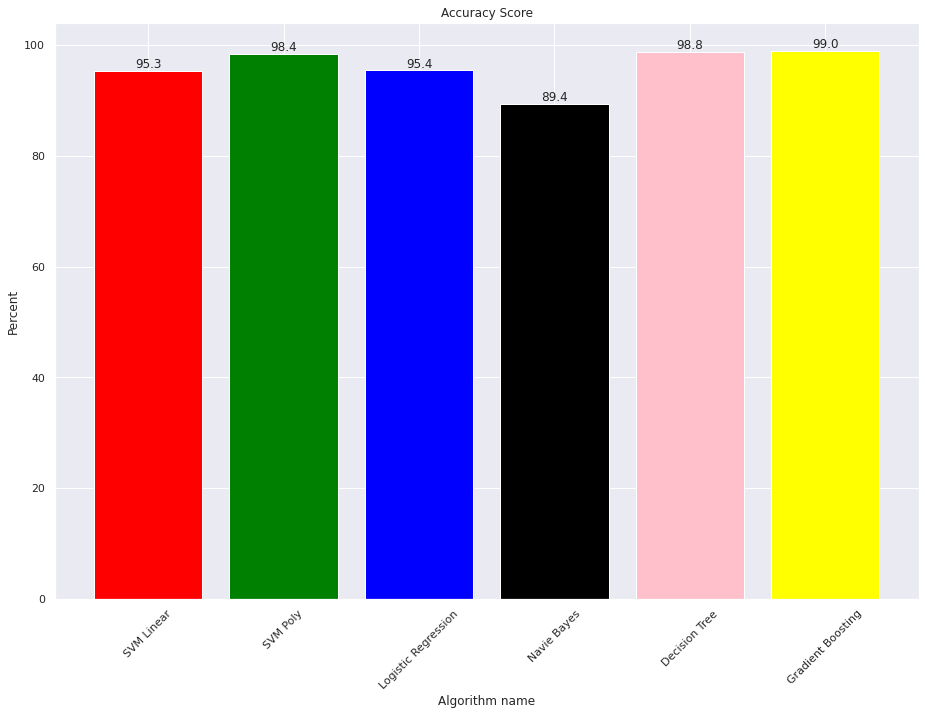

In [ ]:
NewPlotBarAccuracy(new_accuracy_list,'Accuracy')